# Homework 1 Part 2

This is an individual assignment.

**Due: Monday, September 26 @ 11:59pm**

---

In [1]:
# import all libraries and magics
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, train_test_split
import scipy.stats as stats

# Problem 1 (22.5 points)

Consider the diabetes data:

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(return_X_y=False)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

This dataset is already described in the **feature space**. Each input sample $x_i$ is described as 10-dimensional feature vctor $\phi(x_i)$. The features correspond to: age, sex, bmi, bp, s1, s2, s3, s4, s5 and s6 measurements (read the description above for more details). The target variable corresponds a measure of diabetes disease progression one year after baseline.

Let's load the data as a ```pandas``` dataframe:

In [3]:
import numpy as np
import pandas as pd

df_diabetes = pd.DataFrame(data=np.hstack((diabetes.target[:,np.newaxis],diabetes.data)), 
                  columns=['Target']+diabetes.feature_names)

df_diabetes

,Target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


The goal is to fit a linear regression model on the provided features, i.e., the model is of the form:

$$y(x) = w_0 + w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + \dots + w_{10}\phi_{10}(x)$$

where $w_0$ is the bias (or intercept) coefficient and all other $w_i, i=1,\dots,10$ correspond to the coefficient associated with feature $\phi_i$ (age, sex, bmi, bp, etc.).

## Questions

1. Randomly partition the data into training (70%) and test sets (30%).

2. Use a 5-fold cross-validation strategy to determine the hyperparameter values to fit a linear regression model with ridge regularization for this dataset. Show and document your work.

3. Evaluate performance in the test set.

4. Determine the final value for the intercept and coefficients of the linear regression model. Plot all 11 values as a ```stem``` plot. 

5. Based on this plot, which input variable (also referred to the independent variable) has the most contribution for predicting the target variable (also referred to the dependent variable)?

In [4]:
Train_dataset = np.array(df_diabetes.iloc[:,1:])
Target_dataset = np.array(df_diabetes.iloc[:,0])

# Split dataset randomly into training 70% and test 30%

X_train, X_test, t_train, t_test = train_test_split(Train_dataset, Target_dataset, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape,t_train.shape,t_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [5]:
def Regression_model(x,t,M,lam):
    
    #feature matrix
    X = np.zeros((len(x),M+1))
    X[:,0] = 1
    X[:,1:] = np.array([x[:,m] for m in range(M)]).T
    
    #Compute the solution for the parameter w
    w = np.linalg.inv(X.T@X+lam*np.eye(M+1))@X.T@t
    
    #Compute model prediction
    y = X@w
    
    return w,y

def Regression_model_test(x,M,w):
    
    #feature matrix
    X = np.zeros((len(x),M+1))
    X[:,0] = 1
    X[:,1:] = np.array([x[:,m] for m in range(M)]).T
    
    #Prediction for test set
    y = X@w
    
    return y

In [6]:
k = 5 #number of folds
kf= KFold(n_splits=k,shuffle=True)

M_vals = range(1,11) #model orders
lam_vals = np.arange(0.1,1.1,0.1) #set of values for lambda

MSE_train_avg_array = []
MSE_val_avg_array = []
              

for M in M_vals:
    for lam in lam_vals:
        
        print('M value: ',M)
        print('lambda value: ',lam)
        
        #for each training/validation split
        f = 1
        
        #Intializing performance measures
        MSE_train_avg = 0
        MSE_val_avg = 0
    
        
        for train_index, val_index in kf.split(X_train):
            print('\nFold',f)
            
            # Selecting training set using indeces from kf.split
            X_train2,X_validation = X_train[train_index],X_train[val_index]
            
            # Select validation set using indeced from kf.split
            T_train2, T_validation = t_train[train_index],t_train[val_index]
            
            #train model with training set
            
            w,y_train = Regression_model(X_train2,T_train2,M,lam)
            
            #evaluate trained model in validation set
            
            y_val = Regression_model_test(X_validation,M,w)
            
            #Perfromance Measure
            MSE_train = np.mean((T_train2 - y_train)**2)
            MSE_val = np.mean((T_validation - y_val)**2)
            
            # Average performance measure
            MSE_train_avg = MSE_train_avg+MSE_train
            MSE_val_avg = MSE_val_avg+MSE_val
            print('MSE Training = ', MSE_train)
            print('MSE Validation = ', MSE_val)
            f+=1
              
    print('\nAverage Performance in Training = ', MSE_train_avg/k)
    print('Average Performance in Validation = ', MSE_val_avg/k)
    print('-----------------------------------------------------\n')
    MSE_train_avg_array.append([MSE_train_avg/k,M,lam])
    MSE_val_avg_array.append([MSE_val_avg/k,M,lam])

M value:  1
lambda value:  0.1

Fold 1
MSE Training =  6152.051412265145
MSE Validation =  5713.122226120677

Fold 2
MSE Training =  6071.160263951632
MSE Validation =  5963.600653208849

Fold 3
MSE Training =  5945.373895088402
MSE Validation =  6444.078128746192

Fold 4
MSE Training =  6174.976111474362
MSE Validation =  5541.53500567769

Fold 5
MSE Training =  5868.177292052579
MSE Validation =  6764.625960720862
M value:  1
lambda value:  0.2

Fold 1
MSE Training =  6143.095128219603
MSE Validation =  5720.48482636294

Fold 2
MSE Training =  6085.286953972211
MSE Validation =  6151.89156041568

Fold 3
MSE Training =  5872.4068233767375
MSE Validation =  6942.853837144927

Fold 4
MSE Training =  5917.395180378026
MSE Validation =  6573.161013089096

Fold 5
MSE Training =  6188.446111399414
MSE Validation =  5635.6810632107
M value:  1
lambda value:  0.30000000000000004

Fold 1
MSE Training =  5945.722162443371
MSE Validation =  6570.439566625934

Fold 2
MSE Training =  6120.37024564

MSE Training =  4189.1085634904175
MSE Validation =  4457.491089446723

Fold 5
MSE Training =  4184.822867532006
MSE Validation =  4458.295581704913
M value:  5
lambda value:  0.9

Fold 1
MSE Training =  4417.197067394922
MSE Validation =  4050.1122260550483

Fold 2
MSE Training =  4227.2285748758
MSE Validation =  4293.610940922006

Fold 3
MSE Training =  4372.842744849458
MSE Validation =  3959.0164449779077

Fold 4
MSE Training =  4288.793257780934
MSE Validation =  4126.94781882209

Fold 5
MSE Training =  4093.9005939772896
MSE Validation =  5592.294734840444
M value:  5
lambda value:  1.0

Fold 1
MSE Training =  4366.035486443334
MSE Validation =  4072.33285124634

Fold 2
MSE Training =  4317.007826763526
MSE Validation =  4675.883535190873

Fold 3
MSE Training =  4090.1317659821966
MSE Validation =  5709.060890014934

Fold 4
MSE Training =  4443.618385848444
MSE Validation =  4229.518388038346

Fold 5
MSE Training =  4561.806340636248
MSE Validation =  3589.4681781348763

Average

In [7]:

MSE_train_avg_min = 0
MSE_val_avg_min = 0
for i in range (1, len(MSE_train_avg_array)):
    if MSE_train_avg_array[i][0] + MSE_val_avg_array[i][0] < MSE_train_avg_array[i-1][0] + MSE_val_avg_array[i-1][0]:
        MSE_train_avg_min = MSE_train_avg_array[i]
        MSE_val_avg_min = MSE_val_avg_array[i]
    else:
        MSE_train_avg_min = MSE_train_avg_array[i]
        MSE_val_avg_min = MSE_val_avg_array[i]

print(MSE_train_avg_min)
print(MSE_val_avg_min)       

Best_M = MSE_train_avg_min[1]
Best_lam = MSE_train_avg_min[2]

print(Best_M , Best_lam)

[3599.3425582005175, 10, 1.0]
[3692.7295418316126, 10, 1.0]
10 1.0


[ 151.83795214   37.25359537  -62.81959403  294.37256604  179.73613433
   11.99678664  -21.20478753 -139.95973386  115.77914634  232.12731557
  107.00626591]
3069.1673738881323
intercept:  151.83795213900083
coefficiant:  [  37.25359537  -62.81959403  294.37256604  179.73613433   11.99678664
  -21.20478753 -139.95973386  115.77914634  232.12731557  107.00626591]


<StemContainer object of 3 artists>

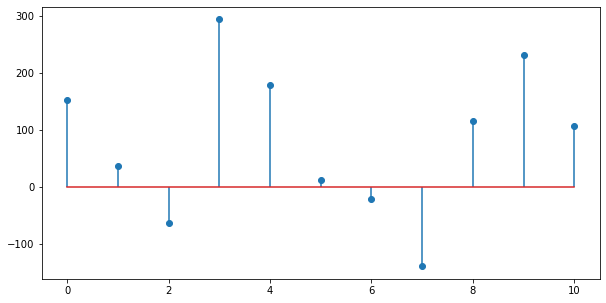

In [8]:
# Training the full model with best values of M and lam obtained from K-fold Cross validation 
w,y_final = Regression_model(X_train,t_train,Best_M,Best_lam)
print(w)

# value of y from the trained model 
y_val_final = Regression_model_test(X_test,Best_M,w)

MSE = np.mean((t_test - y_val_final)**2)
print(MSE)

intercept = w[0];
coefficient = w[1:];

print("intercept: ", intercept)
print("coefficiant: ", coefficient)

# plotting
m = [i for i in range(M+1)]
fig = plt.figure(figsize = (10,5))
plt.stem(m,w)



### Answer 1.5
#### Based on the stem plot from above the input variable at the index 3 has the most contribution in the output variable. In the provided  Diabetes dataset the index 3 belongs to bmi . Thus, BMI input variable contributes most in the output variable. 

___

# Problem 2 (25 points)

Suppose that a taxi company wants to estimate the average number of trips per hour for the upcoming weekend in Downtown Gainesville. The company is working under the assumption that the number of passengers can be modeled with a Poisson random variable (RV) with parameter $\lambda$ ($\lambda>0$).

* The poisson RV with parameter $\lambda$ has the following probability mass function (PMF): $p(x) = \frac{\lambda^x e^{-\lambda}}{x!}$.

The company's engineers decide to use a Gamma RV with parameters $\alpha=5$ and $\beta=0.5$ as the prior probability for the unknown parameter $\lambda$.

* The Gamma RV with parameters $\alpha$ and $\beta$ ($\alpha,\beta>0$) has the following probability density function: $f(\lambda)=\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$.

Suppose that you have a set of data with 10 samples:
\begin{align*}
x=[12,  5, 10, 10,  7, 17, 6, 11, 9, 9]
\end{align*}

Answer the following questions:

1. Compute the MLE estimate for $\lambda$. Show all your work.

2. Compute the MAP estimate for $\lambda$. Show all your work.

3. Does Poisson-Gamma form a prior conjugate relationship? Provide the pseudo-code for online updated of the prior parameters.

4. Suppose the dataset ```hourly_trips.npy``` is the dataset coming in hourly (one sample at a time). Use this data to perform online update of the prior parameters. Start with an initial guess of $\alpha=3$ and $\beta=1$. Include a plot showing the estimated value for $\lambda$ (using MLE and MAP) as data samples are received. (The true value is $\lambda=10$.)

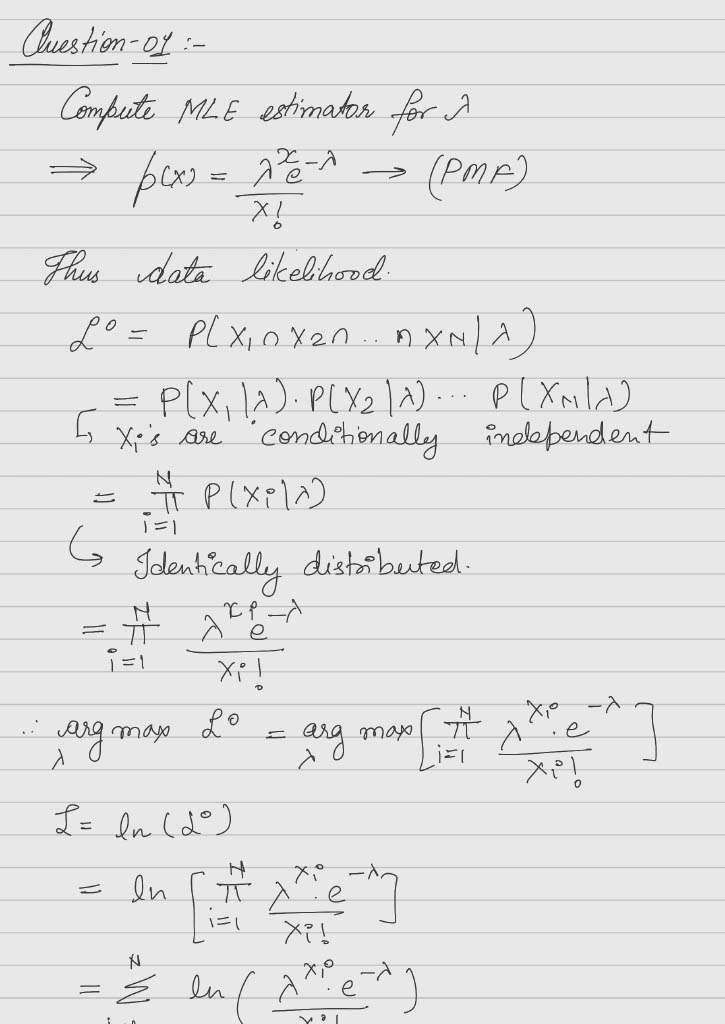

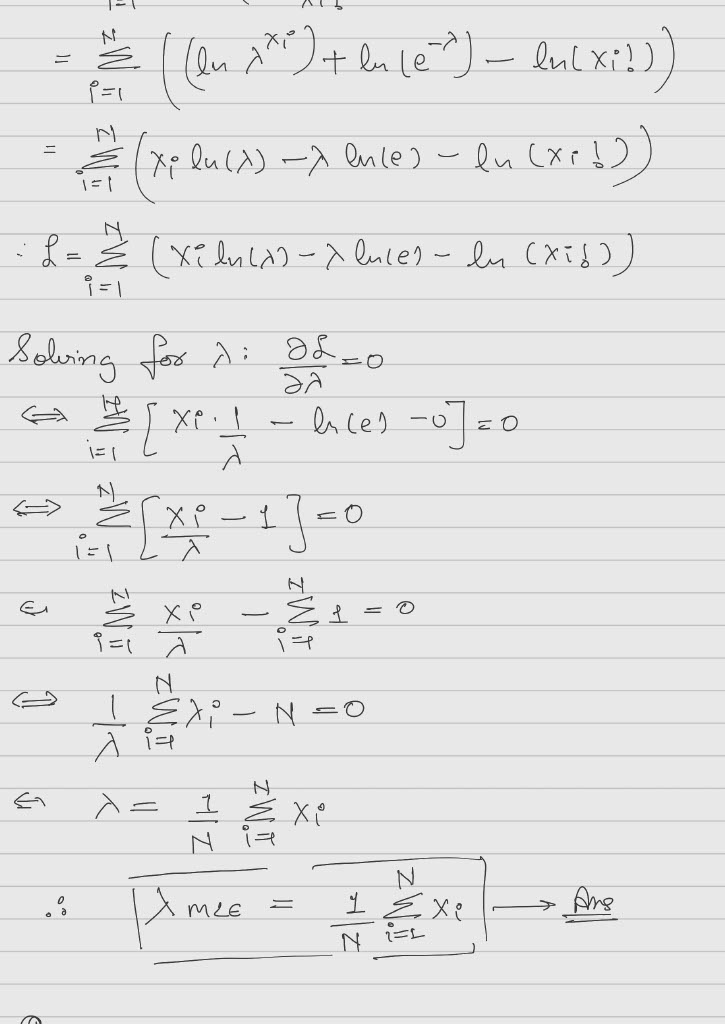

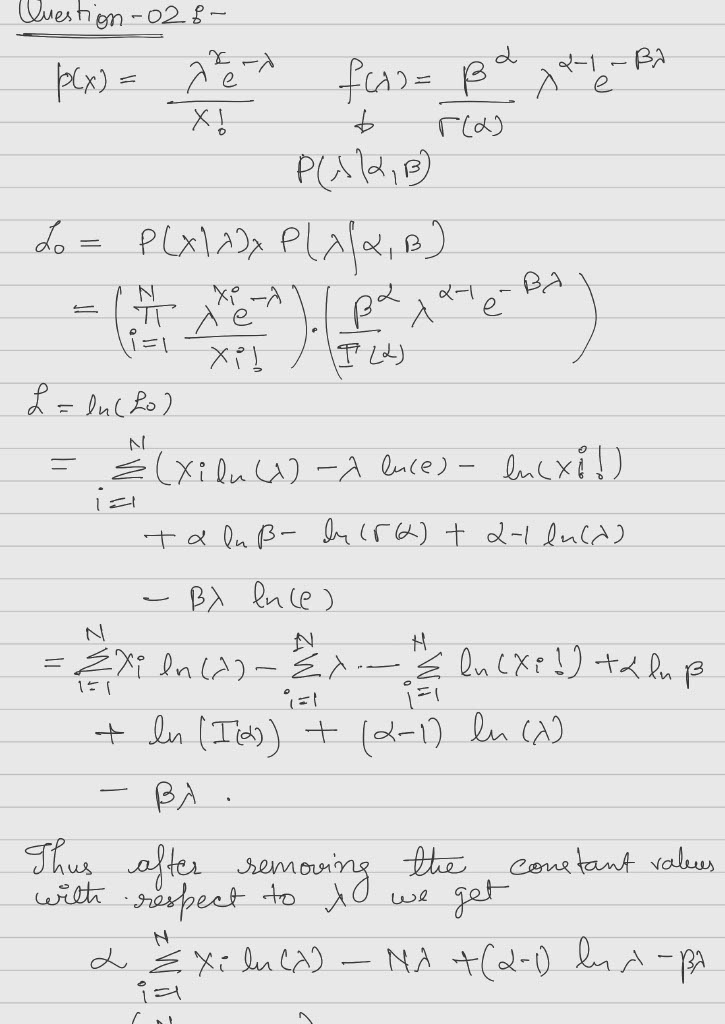

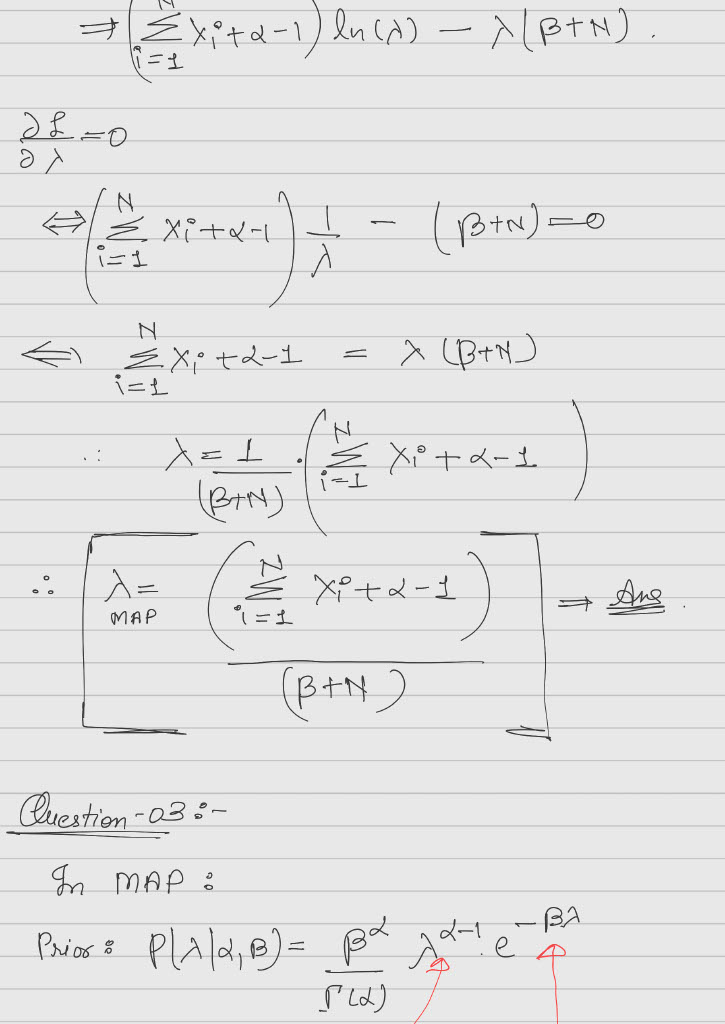

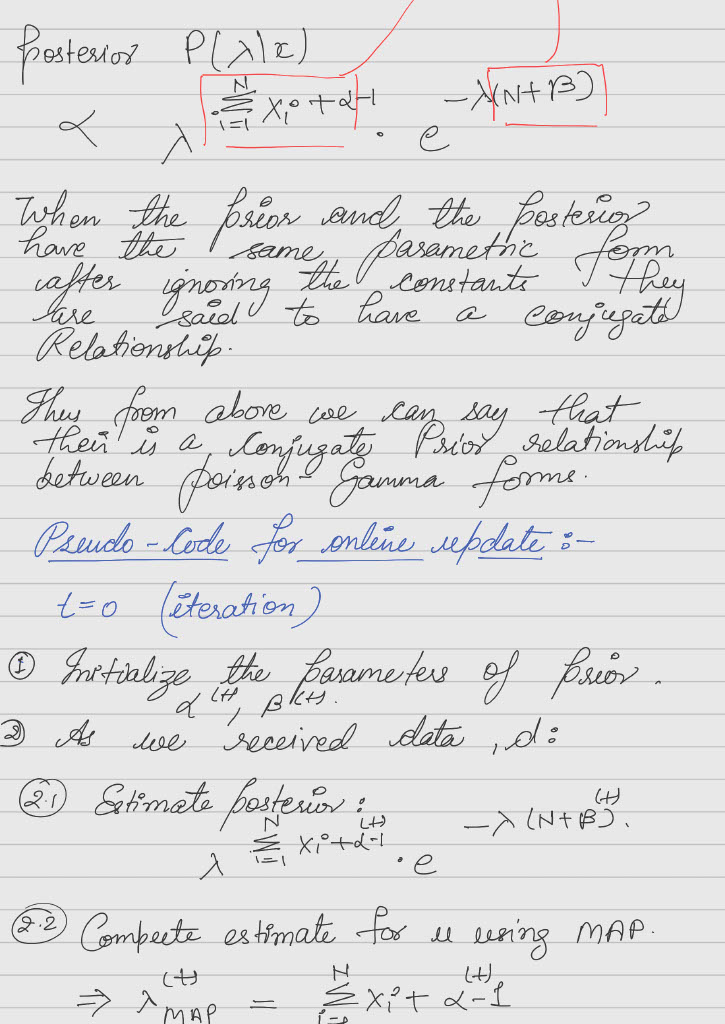

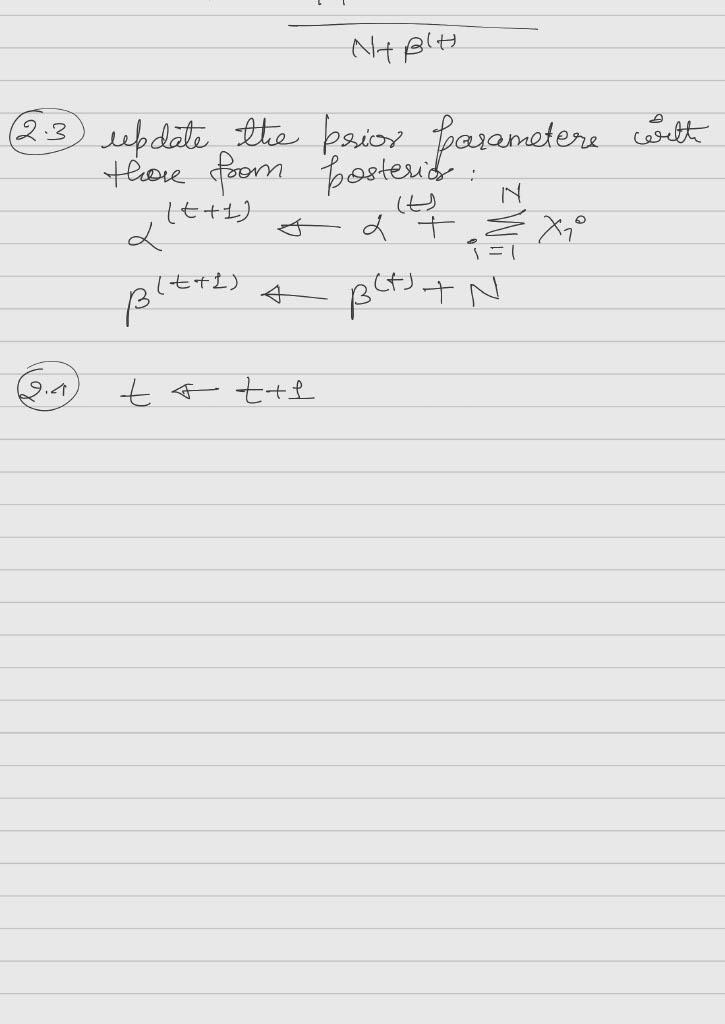

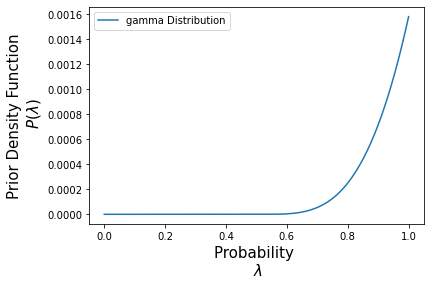

In [9]:
a = 5
b = 0.5

gamma =stats.gamma(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, gamma.pdf(x), label='gamma Distribution')
plt.legend(loc='best')
plt.xlabel('Probability \n $\lambda$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\lambda)$',fontsize=15);

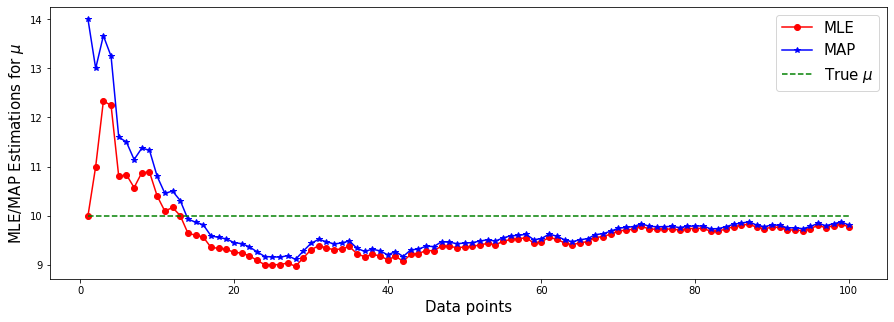

In [10]:
# True value of the unknown parameter
truelem = 10 # 0.5 for a fair coin

# Prior Initial Parameters
a=5 # alpha
b=0.5 # beta

# Sampling Training Data
Nattempts = 100
Outcomes = stats.poisson(truelem).rvs(Nattempts)

# Computing MLE and MAP estimates as data is being collected
lem_MLE = []
lem_MAP = []
for i in range(1,Nattempts+1):
    lem_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    lem_MAP += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i]+b))]

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Nattempts+1), lem_MLE, '-or', label='MLE')
plt.plot(range(1,Nattempts+1), lem_MAP, '-*b', label='MAP')
plt.plot(range(1,Nattempts+1), [truelem]*Nattempts, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

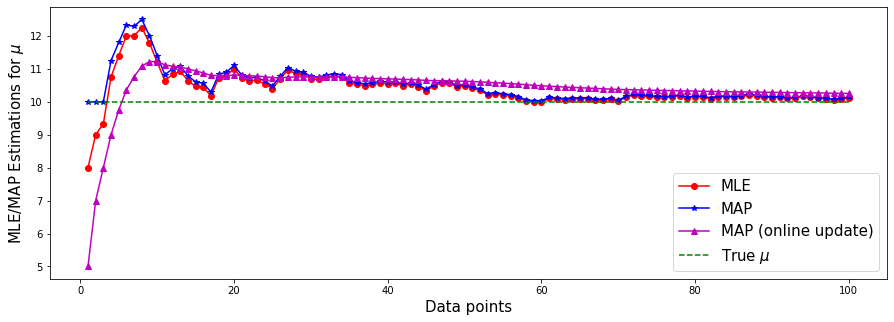

In [11]:
# True value of the unknown parameter
truelem = 10 

# Prior Initial Parameters
a=3; a_init = a
b=1; b_init = b

# Sampling Training Data
Nattempts = 100
Outcomes = stats.poisson(truelem).rvs(Nattempts)

# Computing MLE and MAP estimates as data is being collected
lem_MLE = []
lem_MAP = []
lem_MAP_update = []
for i in range(1,Nattempts+1):
    lem_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    lem_MAP += [(np.sum(Outcomes[:i])+a_init-1)/(len(Outcomes[:i]+b_init))]
    lem_MAP_update += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+b)]
    a += np.sum(Outcomes[:i])
    b += len(Outcomes[:i])

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Nattempts+1), lem_MLE, '-or', label='MLE')
plt.plot(range(1,Nattempts+1), lem_MAP, '-*b', label='MAP')
plt.plot(range(1,Nattempts+1), lem_MAP_update, '-^m', label='MAP (online update)')
plt.plot(range(1,Nattempts+1), [truelem]*Nattempts, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___